In [1]:
#作业


#2.图与会话

#2.1 在一个notebook文件中构建一张图，实现两个数的加法操作，并在两个不同的会话中执行图。
import tensorflow as tf
#创建图
a = tf.add(3, 5)
#创建会话
sess1 = tf.Session()
sess2 = tf.Session()
#执行图
res1 = sess1.run(a)
#关闭会话
sess1.close()
sess2.close()

#2.2 查找资料学习TensorFlow中执行常量基本运算API的基本用法，如`tf.add`、`tf.subtract`、`tf.multiply`、`tf.divide`、`tf.mod`、`tf.pow`、
#`tf.square`、`tf.sqrt`等的用法，并在notebook中演示其基本用法
a = tf.constant(4, name = 'a')
b = tf.constant(3, name = 'b')
#add,subtract,multiply,divide,mod,pow需要第一个第二个操作数类型一致
#均有name属性，name=None,运算的名字
#加法
add_op = tf.add(a, b)
#减法
sub_op = tf.subtract(a, b)
#乘法
mul_op = tf.multiply(a, b)
#除法
did_op = tf.divide(a, b)
#取模
mod_op = tf.mod(a, b)
#幂次方
pow_op = tf.pow(a, b)
#平方
sqr_op = tf.square(a)
#开根号
#参数必须是下列类型之一：half，float32，float64，complex64，complex128
#tf.sqrt函数返回 Tensor 或者 SparseTensor，与 x 具有相同的类型相同
sqt_op = tf.sqrt(4.0)
#执行
with tf.Session() as sess:
    print(sess.run(add_op))
    print(sess.run(sub_op))
    print(sess.run(mul_op))
    print(sess.run(did_op))
    print(sess.run(mod_op))
    print(sess.run(pow_op))
    print(sess.run(sqr_op))
    print(sess.run(sqt_op))

7
1
12
1.3333333333333333
1
64
16
2.0


In [11]:
#3.图的边与节点

#3.1 有一4阶张量`img`其`shape=[10, 28, 28, 3])`，代表10张28*28像素的3通道RGB图像，问：

#1. 如何利用索引取出第2张图片？（注意：索引均从0开始，第二张则索引为1，下同）
#2. 如何利用切片取出第2张图片？
#3. 使用切片与使用索引取出的一张图片有何不同？
#4. 如何取出其中的第1、3、5、7张图片？
#5. 如何取出第6-8张（包括6不包括8）图片中中心区域（14*14）的部分？
#6. 如何将图片根据通道拆分成三份单通道图片？
#7. 写出`tf.shape(img)`返回的张量的阶数以及`shape`属性的值。

import tensorflow as tf
#构建一个四阶张量
img = tf.zeros([10, 28, 28, 3])
print(img.get_shape().as_list())
#1.利用索引取出第2张图片
img1 = img[1, :, :, :]
#2.利用切片取出第2张图片
img2 = tf.slice(img, [1, 0, 0, 0], [1, 28, 28, 3])
#3.不同：切片返回的是一个4阶张量，索引返回的是一个3阶张量
#4.取出其中的第1、3、5、7张图片
img4 = img[0:8:2, :, :, :]
#5.取出第6-8张（包括6不包括8）图片中中心区域（14*14）的部分
img5 = img[6:8, 7:14, 7:14, :]
#6.将图片根据通道拆分成三份单通道图片
img6_1, img6_2, img6_3 = tf.split(img, [1, 1, 1], 3)
#7.`tf.shape(img)`返回的张量的阶数以及`shape`属性的值
rank = tf.rank(img)
shape = tf.shape(img)

with tf.Session() as sess:
    print(sess.run(img1))
    print(sess.run(img2))
    print(sess.run(img4))
    print(sess.run(img5))
    print(sess.run(img6_1))
    print(sess.run(img6_2))
    print(sess.run(img6_3))
    print(sess.run(rank))
    print(sess.run(shape))

[10, 28, 28, 3]
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0.

Epoch: 0050 cost= 0.083288305 W= 0.20550817 b= 1.1186137
Epoch: 0100 cost= 0.082565308 W= 0.20812966 b= 1.0997554
Epoch: 0150 cost= 0.081925444 W= 0.2105955 b= 1.0820159
Epoch: 0200 cost= 0.081359208 W= 0.21291478 b= 1.0653313
Epoch: 0250 cost= 0.080858126 W= 0.21509613 b= 1.049639
Epoch: 0300 cost= 0.080414623 W= 0.21714792 b= 1.0348779
Epoch: 0350 cost= 0.080022193 W= 0.21907765 b= 1.0209959
Epoch: 0400 cost= 0.079674870 W= 0.22089261 b= 1.0079395
Epoch: 0450 cost= 0.079367459 W= 0.22259979 b= 0.995658
Epoch: 0500 cost= 0.079095393 W= 0.22420537 b= 0.9841074
Epoch: 0550 cost= 0.078854591 W= 0.22571547 b= 0.9732437
Epoch: 0600 cost= 0.078641452 W= 0.22713584 b= 0.9630259
Epoch: 0650 cost= 0.078452826 W= 0.22847138 b= 0.9534181
Epoch: 0700 cost= 0.078285865 W= 0.22972746 b= 0.944382
Epoch: 0750 cost= 0.078138068 W= 0.23090887 b= 0.93588305
Epoch: 0800 cost= 0.078007244 W= 0.23202002 b= 0.9278897
Epoch: 0850 cost= 0.077891417 W= 0.23306507 b= 0.9203715
Epoch: 0900 cost= 0.077788830 W= 0

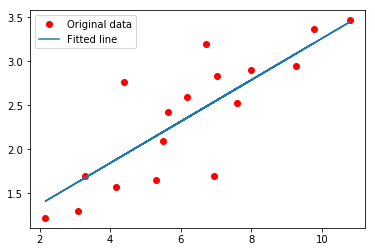

In [5]:
#4.常量、变量、占位符
#4.1 构建二元线性回归模型，其中模型中的参数使用`tf.Variable()`构建，模型的样本输入使用`tf.placeholder`代替。写出模型结构
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random
# 参数
learning_rate = 0.01
training_epochs = 1000
display_step = 50
# 训练数据
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167, 7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221, 2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]
X = tf.placeholder("float")
Y = tf.placeholder("float")
# 模型参数
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")
# 构建线性模型
pred = tf.add(tf.multiply(X, W), b) 
# 求误差
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# 使用梯度下降拟合数据
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
# 初始化所有变量
init = tf.initialize_all_variables()
# 开始
with tf.Session() as sess: 
    sess.run(init)
    # Fit all training data 
    for epoch in range(training_epochs): 
        for (x, y) in zip(train_X, train_Y): 
            sess.run(optimizer, feed_dict={X: x, Y: y})
        #Display logs per epoch step
        if (epoch+1) % display_step == 0: 
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c),  "W=", sess.run(W), "b=", sess.run(b))
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b))
    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()